In [1]:
import pandas as pd 
import numpy as np 
import torch
import torch.nn as nn 

classes = np.load('/Users/HPhuc/Practice/12. classification/vinbigdata/output/columns_14.npy')
 
data = pd.read_csv('/Users/HPhuc/Practice/12. classification/vinbigdata/output/csv/data.csv', index_col=0)
data

,image_ids,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,image_paths,Images
0,50a418190bc3fb1ef1633bf9678929b3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/drive/MyDrive/Classification2D/vinbig...,/content/drive/MyDrive/Classification2D/Source...
1,21a10246a5ec7af151081d0cd6d65dc9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/drive/MyDrive/Classification2D/vinbig...,/content/drive/MyDrive/Classification2D/Source...
2,9a5094b2563a1ef3ff50dc5c7ff71345,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,/content/drive/MyDrive/Classification2D/vinbig...,/content/drive/MyDrive/Classification2D/Source...
3,051132a778e61a86eb147c7c6f564dfe,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/content/drive/MyDrive/Classification2D/vinbig...,/content/drive/MyDrive/Classification2D/Source...
4,063319de25ce7edb9b1c6b8881290140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/drive/MyDrive/Classification2D/vinbig...,/content/drive/MyDrive/Classification2D/Source...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,7c0ddf911bdb68fca14d7172486827cb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/drive/MyDrive/Classification2D/vinbig...,/content/drive/MyDrive/Classification2D/Source...
14996,209e3a5c73c1195d805dd25d086b3c6d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/drive/MyDrive/Classification2D/vinbig...,/content/drive/MyDrive/Classification2D/Source...
14997,1bea772246421c37929f8cbc43dba729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/drive/MyDrive/Classification2D/vinbig...,/content/drive/MyDrive/Classification2D/Source...
14998,ae86eabab95525b41b8e79883ff1cef9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/drive/MyDrive/Classification2D/vinbig...,/content/drive/MyDrive/Classification2D/Source...


In [2]:
pd.DataFrame([data[f'{c}'].value_counts() for i, c in enumerate(classes)], index=classes)


,0.0,1.0
Aortic enlargement,11933,3067
Atelectasis,14814,186
Calcification,14548,452
Cardiomegaly,12700,2300
Consolidation,14647,353
ILD,14614,386
Infiltration,14387,613
Lung Opacity,13678,1322
Nodule Mass,14174,826
Other lesion,13866,1134


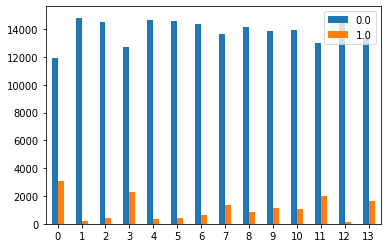

In [3]:
classes_cnt = pd.DataFrame([data[f'{c}'].value_counts() for i, c in enumerate(classes)], index= [i for i in range(len(classes))])
ax = classes_cnt.plot.bar(rot=0)

In [4]:
classes_cnt = [data[f'{c}'].sum(axis=0) for c in classes]

In [5]:
num_of_disease = pd.DataFrame({'num.of.diseases': classes_cnt}, index=classes)
num_of_disease

,num.of.diseases
Aortic enlargement,3067.0
Atelectasis,186.0
Calcification,452.0
Cardiomegaly,2300.0
Consolidation,353.0
ILD,386.0
Infiltration,613.0
Lung Opacity,1322.0
Nodule Mass,826.0
Other lesion,1134.0


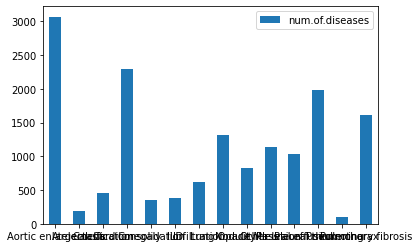

In [6]:
ax = num_of_disease.plot.bar(rot=0)